In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
LR = LogisticRegression()
data =  pd.read_csv('/Users/zfy/Documents/titanic/train.csv')
x = data.iloc[: , data.columns != 'Survived']
y = data.iloc[: , data.columns == 'Survived']
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x ,y ,test_size=0.33)
Res = LR.fit(Xtrain,Ytrain)
Score = Res.Score(Xtest ,Ytest)
print(Score)

ValueError: could not convert string to float: 'McNamee, Mr. Neal'

In [2]:
#ValueError: could not convert string to float: 'Staneff, Mr. Ivan'
#显然，名字不需要考虑
#使用drop删除

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
LR = LogisticRegression()
data =  pd.read_csv('/Users/zfy/Documents/titanic/train.csv')
data.drop(['Name'],inplace = True , axis = 1)
x = data.iloc[: , data.columns != 'Survived']
y = data.iloc[: , data.columns == 'Survived']
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x ,y ,test_size=0.33)
Res = LR.fit(Xtrain,Ytrain)
Score = Res.Score(Xtest ,Ytest)
print(Score)

ValueError: could not convert string to float: 'male'

In [5]:
#ValueError: could not convert string to float: 'male'
#将male/female转化为0，1

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
LR = LogisticRegression()
data =  pd.read_csv('/Users/zfy/Documents/titanic/train.csv')
data.loc[: , 'Sex'] = (data['Sex'] == 'male').astype('int')
data.drop(['Name'],inplace = True , axis = 1)
x = data.iloc[: , data.columns != 'Survived']
y = data.iloc[: , data.columns == 'Survived']
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x ,y ,test_size=0.33)
Res = LR.fit(Xtrain,Ytrain)
Score = Res.Score(Xtest ,Ytest)
print(Score)

ValueError: could not convert string to float: 'SC/PARIS 2149'

In [9]:
#ValueError: could not convert string to float: 'SC/PARIS 2149
#明显无用，删除

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
LR = LogisticRegression()
data =  pd.read_csv('/Users/zfy/Documents/titanic/train.csv')
data.loc[: , 'Sex'] = (data['Sex'] == 'male').astype('int')
data.drop(['Name'],inplace = True , axis = 1)
data.drop(['Ticket'],inplace = True , axis = 1)
x = data.iloc[: , data.columns != 'Survived']
y = data.iloc[: , data.columns == 'Survived']
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x ,y ,test_size=0.33)
Res = LR.fit(Xtrain,Ytrain)
Score = Res.Score(Xtest ,Ytest)
print(Score)

ValueError: could not convert string to float: 'B42'

In [11]:
#Cabin数据进行观察

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#cabin缺失量较多，但是占多少呢？

In [14]:
print('Percent of missing "Cabin" records is %.2f%%' %((data['Cabin'].isnull().sum()/data.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [15]:
#数据大量缺失，直接去掉

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
LR = LogisticRegression()
data =  pd.read_csv('/Users/zfy/Documents/titanic/train.csv')
data.loc[: , 'Sex'] = (data['Sex'] == 'male').astype('int')
data.drop(['Name','Ticket','Cabin'],inplace = True , axis = 1)
x = data.iloc[: , data.columns != 'Survived']
y = data.iloc[: , data.columns == 'Survived']
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x ,y ,test_size=0.33)
Res = LR.fit(Xtrain,Ytrain)
Score = Res.Score(Xtest ,Ytest)
print(Score)

ValueError: could not convert string to float: 'C'

In [17]:
#将embark数据转换，不能使用one-hot coding

In [25]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
LR = LogisticRegression()
enc = preprocessing.OneHotEncoder()
data =  pd.read_csv('/Users/zfy/Documents/titanic/train.csv')
data.loc[: , 'Sex'] = (data['Sex'] == 'male').astype('int')
data.drop(['Name','Ticket','Cabin'],inplace = True , axis = 1)
labels = data['Embarked'].unique().tolist()#unique看有几个取值
data['Embarked'] = data['Embarked'].apply(lambda x:labels.index(x))#将索引转换为数字
print(data['Embarked'])
x = data.iloc[: , data.columns != 'Survived']
y = data.iloc[: , data.columns == 'Survived']
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x ,y ,test_size=0.33)
Res = LR.fit(Xtrain,Ytrain)
Score = Res.Score(Xtest ,Ytest)
print(Score)

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [26]:
#发现依旧有Null，回去看发现是age
#来看看Age的分布

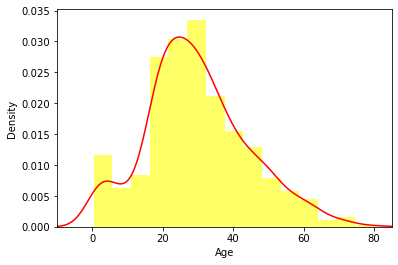

In [32]:
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='yellow', alpha=0.6)
data["Age"].plot(kind='density', color='red')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [33]:
#正态分布
#可以均值填充

In [38]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
LR = LogisticRegression()
enc = preprocessing.OneHotEncoder()
data =  pd.read_csv('/Users/zfy/Documents/titanic/train.csv')
data.loc[: , 'Sex'] = (data['Sex'] == 'male').astype('int')
data.drop(['Name','Ticket','Cabin'],inplace = True , axis = 1)
labels = data['Embarked'].unique().tolist()#unique看有几个取值
data['Embarked'] = data['Embarked'].apply(lambda x:labels.index(x))#将索引转换为数字
data['Age'] = data['Age'].fillna(data['Age'].mean())
print(data)
x = data.iloc[: , data.columns != 'Survived']
y = data.iloc[: , data.columns == 'Survived']
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x ,y ,test_size=0.33)
Res = LR.fit(Xtrain,Ytrain)
Score = Res.score(Xtest ,Ytest)
print(Score)

     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    1  22.000000      1      0   7.2500   
1              2         1       1    0  38.000000      1      0  71.2833   
2              3         1       3    0  26.000000      0      0   7.9250   
3              4         1       1    0  35.000000      1      0  53.1000   
4              5         0       3    1  35.000000      0      0   8.0500   
..           ...       ...     ...  ...        ...    ...    ...      ...   
886          887         0       2    1  27.000000      0      0  13.0000   
887          888         1       1    0  19.000000      0      0  30.0000   
888          889         0       3    0  29.699118      1      2  23.4500   
889          890         1       1    1  26.000000      0      0  30.0000   
890          891         0       3    1  32.000000      0      0   7.7500   

     Embarked  
0           0  
1           1  
2           0  
3          

/Users/zfy/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/zfy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
#拟合低，继续修改数据

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
X = data
y = data['Survived']
model = LogisticRegression()
#选取六个
rfe = RFE(model, 6)
rfe = rfe.fit(X, y)
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']


/Users/zfy/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/zfy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zfy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of

In [42]:
#在pycharm试试
#选取'Pclass', 'Sex', 'Age', 'SibSp', 'Embarked

In [48]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
LR = LogisticRegression()
enc = preprocessing.OneHotEncoder()
data =  pd.read_csv('/Users/zfy/Documents/titanic/train.csv')
data.loc[: , 'Sex'] = (data['Sex'] == 'male').astype('int')
labels = data['Embarked'].unique().tolist()#unique看有几个取值
data['Embarked'] = data['Embarked'].apply(lambda x:labels.index(x))#将索引转换为数字
data['Age'] = data['Age'].fillna(data['Age'].mean())
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked','Survived']
data = data[cols]
print(data)
x = data.iloc[: , data.columns != 'Survived']
y = data.iloc[: , data.columns == 'Survived']
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x ,y ,test_size=0.33,random_state=42)
Res = LR.fit(Xtrain,Ytrain)
Score = Res.score(Xtest ,Ytest)
print(Score)

     Pclass  Sex        Age  SibSp  Embarked  Survived
0         3    1  22.000000      1         0         0
1         1    0  38.000000      1         1         1
2         3    0  26.000000      0         0         1
3         1    0  35.000000      1         0         1
4         3    1  35.000000      0         0         0
..      ...  ...        ...    ...       ...       ...
886       2    1  27.000000      0         0         0
887       1    0  19.000000      0         0         1
888       3    0  29.699118      1         0         0
889       1    1  26.000000      0         1         1
890       3    1  32.000000      0         2         0

[891 rows x 6 columns]
0.8203389830508474


/Users/zfy/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [49]:
#还可以,修改random_state确定为46

In [50]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
LR = LogisticRegression()
enc = preprocessing.OneHotEncoder()
data =  pd.read_csv('/Users/zfy/Documents/titanic/train.csv')
data.loc[: , 'Sex'] = (data['Sex'] == 'male').astype('int')
labels = data['Embarked'].unique().tolist()#unique看有几个取值
data['Embarked'] = data['Embarked'].apply(lambda x:labels.index(x))#将索引转换为数字
data['Age'] = data['Age'].fillna(data['Age'].mean())
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked','Survived']
data = data[cols]
print(data)
x = data.iloc[: , data.columns != 'Survived']
y = data.iloc[: , data.columns == 'Survived']
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x ,y ,test_size=0.33,random_state=46)
Res = LR.fit(Xtrain,Ytrain)
Score = Res.score(Xtest ,Ytest)
print(Score)

     Pclass  Sex        Age  SibSp  Embarked  Survived
0         3    1  22.000000      1         0         0
1         1    0  38.000000      1         1         1
2         3    0  26.000000      0         0         1
3         1    0  35.000000      1         0         1
4         3    1  35.000000      0         0         0
..      ...  ...        ...    ...       ...       ...
886       2    1  27.000000      0         0         0
887       1    0  19.000000      0         0         1
888       3    0  29.699118      1         0         0
889       1    1  26.000000      0         1         1
890       3    1  32.000000      0         2         0

[891 rows x 6 columns]
0.8338983050847457


/Users/zfy/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [51]:
#是不是特征少了？

In [62]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
LR = LogisticRegression()
enc = preprocessing.OneHotEncoder()
data =  pd.read_csv('/Users/zfy/Documents/titanic/train.csv')
data.loc[: , 'Sex'] = (data['Sex'] == 'male').astype('int')
labels = data['Embarked'].unique().tolist()#unique看有几个取值
data['Embarked'] = data['Embarked'].apply(lambda x:labels.index(x))#将索引转换为数字
data['Age'] = data['Age'].fillna(data['Age'].mean())
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked','Survived','Fare']
data = data[cols]
print(data)
x = data.iloc[: , data.columns != 'Survived']
y = data.iloc[: , data.columns == 'Survived']
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x ,y ,test_size=0.33,random_state=46)
Res = LR.fit(Xtrain,Ytrain)
Score = Res.score(Xtest ,Ytest)
Pred = Res.predict(Xtest)
print(Score)

     Pclass  Sex        Age  SibSp  Embarked  Survived     Fare
0         3    1  22.000000      1         0         0   7.2500
1         1    0  38.000000      1         1         1  71.2833
2         3    0  26.000000      0         0         1   7.9250
3         1    0  35.000000      1         0         1  53.1000
4         3    1  35.000000      0         0         0   8.0500
..      ...  ...        ...    ...       ...       ...      ...
886       2    1  27.000000      0         0         0  13.0000
887       1    0  19.000000      0         0         1  30.0000
888       3    0  29.699118      1         0         0  23.4500
889       1    1  26.000000      0         1         1  30.0000
890       3    1  32.000000      0         2         0   7.7500

[891 rows x 7 columns]
0.8338983050847457


/Users/zfy/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [76]:
#使用GridSearch
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
LR = LogisticRegression()
enc = preprocessing.OneHotEncoder()
data =  pd.read_csv('/Users/zfy/Documents/titanic/train.csv')
data.loc[: , 'Sex'] = (data['Sex'] == 'male').astype('int')
labels = data['Embarked'].unique().tolist()#unique看有几个取值
data['Embarked'] = data['Embarked'].apply(lambda x:labels.index(x))#将索引转换为数字
data['Age'] = data['Age'].fillna(data['Age'].mean())
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked','Survived']
data = data[cols]
print(data)
x = data.iloc[: , data.columns != 'Survived']
y = data.iloc[: , data.columns == 'Survived']
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x ,y ,test_size=0.33,random_state=46)
Res = LR.fit(Xtrain,Ytrain)
Score = Res.score(Xtest ,Ytest)
print(Score)
parameters = {'splitter':('best','random')
              ,'penalty' : ['l1', 'l2', 'elasticnet', 'none']
}
GS = GridSearchCV(Res,parameters,cv=10)
GS.fit(Xtrain,Ytrain)
print(GS.best_params_)
print(GS.best_score_)

     Pclass  Sex        Age  SibSp  Embarked  Survived
0         3    1  22.000000      1         0         0
1         1    0  38.000000      1         1         1
2         3    0  26.000000      0         0         1
3         1    0  35.000000      1         0         1
4         3    1  35.000000      0         0         0
..      ...  ...        ...    ...       ...       ...
886       2    1  27.000000      0         0         0
887       1    0  19.000000      0         0         1
888       3    0  29.699118      1         0         0
889       1    1  26.000000      0         1         1
890       3    1  32.000000      0         2         0

[891 rows x 6 columns]
0.8338983050847457


/Users/zfy/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Invalid parameter splitter for estimator LogisticRegression(penalty='L1'). Check the list of available parameters with `estimator.get_params().keys()`.

In [2]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
LR = LogisticRegression()
enc = preprocessing.OneHotEncoder()
data =  pd.read_csv('/Users/zfy/Documents/titanic/train.csv')
data.loc[: , 'Sex'] = (data['Sex'] == 'male').astype('int')
labels = data['Embarked'].unique().tolist()#unique看有几个取值
data['Embarked'] = data['Embarked'].apply(lambda x:labels.index(x))#将索引转换为数字
data['Age'] = data['Age'].fillna(data['Age'].mean())
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked','Survived']
data = data[cols]
print(data)
x = data.iloc[: , data.columns != 'Survived']
y = data.iloc[: , data.columns == 'Survived']
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x ,y ,test_size=0.33,random_state=46)
Res = LR.fit(Xtrain,Ytrain)
Score = Res.score(Xtest ,Ytest)
print(Score)


     Pclass  Sex        Age  SibSp  Embarked  Survived
0         3    1  22.000000      1         0         0
1         1    0  38.000000      1         1         1
2         3    0  26.000000      0         0         1
3         1    0  35.000000      1         0         1
4         3    1  35.000000      0         0         0
..      ...  ...        ...    ...       ...       ...
886       2    1  27.000000      0         0         0
887       1    0  19.000000      0         0         1
888       3    0  29.699118      1         0         0
889       1    1  26.000000      0         1         1
890       3    1  32.000000      0         2         0

[891 rows x 6 columns]
0.8338983050847457


/Users/zfy/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
